Training and evaluating with linear kernel...
Accuracy with linear kernel: 0.953
Training and evaluating with rbf kernel...
Accuracy with rbf kernel: 0.976
Training and evaluating with poly kernel...
Accuracy with poly kernel: 0.968
Training and evaluating with sigmoid kernel...
Accuracy with sigmoid kernel: 0.883


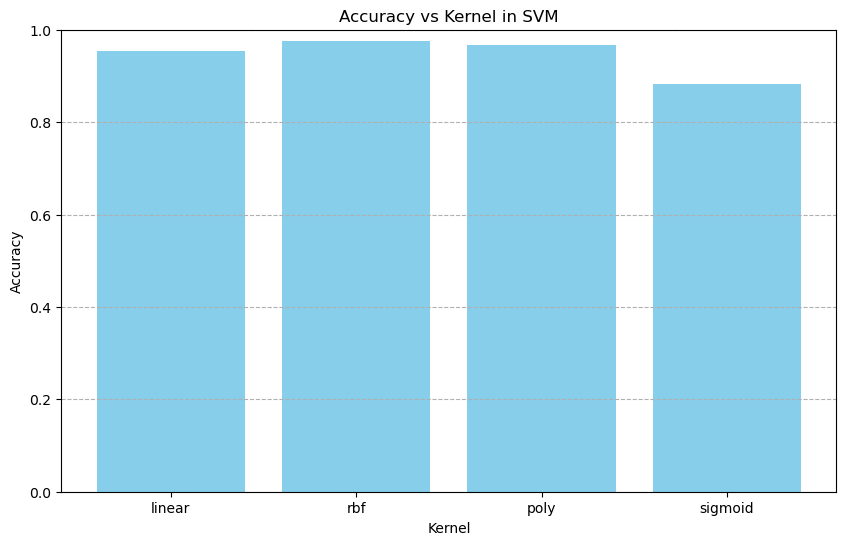

Best Kernel: rbf
Best Accuracy: 0.976
Classification Report for rbf Kernel:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       895
           1       0.43      0.37      0.40       105

    accuracy                           0.88      1000
   macro avg       0.68      0.66      0.67      1000
weighted avg       0.88      0.88      0.88      1000

Confusion Matrix:[[893   2]
 [ 22  83]]


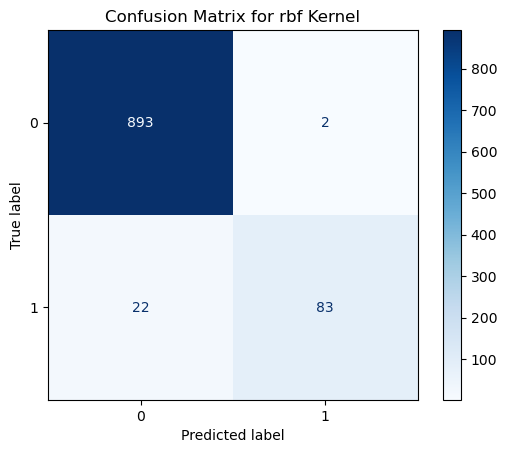

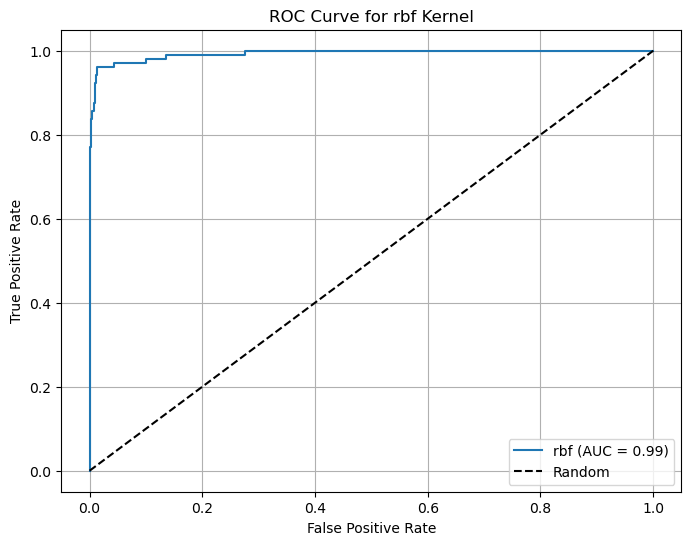

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('UniversalBank.csv')

# Data Cleaning and Preprocessing
# Drop ID and ZIP Code as they are generally not useful for prediction
data = data.drop(['ID', 'ZIP Code'], axis=1)

# Separate features (X) and target variable (y)
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define kernels and dictionaries to store results
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracies = []
confusion_matrices = {}
roc_auc_scores = {}
classification_reports = {}
fprs, tprs = {}, {}

# Iterate through each kernel, train the model, make predictions, and calculate metrics
for kernel in kernels:
    print(f"Training and evaluating with {kernel} kernel...")

    # Train the SVM model
    model = SVC(kernel=kernel, probability=True)  # Enable probability estimates for ROC AUC
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[kernel] = cm

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores[kernel] = roc_auc

    # Calculate precision, recall, and f1-score using classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[kernel] = report

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    fprs[kernel], tprs[kernel] = fpr, tpr

    print(f'Accuracy with {kernel} kernel: {accuracy}')

# Plotting Accuracy vs Kernel
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.title('Accuracy vs Kernel in SVM')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

# Find the kernel with the highest accuracy
best_kernel = kernels[accuracies.index(max(accuracies))]
print(f'Best Kernel: {best_kernel}')
print(f'Best Accuracy: {max(accuracies):.3f}')

# Print precision, recall, and f1-score for the highest accuracy kernel
print(f"Classification Report for {best_kernel} Kernel:")
print(classification_report(y_test, model.predict(X_test)))

# Print Confusion Matrix for the highest accuracy kernel
print(f'Confusion Matrix:{confusion_matrices[best_kernel]}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[best_kernel])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_kernel} Kernel')
plt.show()

# Plot ROC Curve for the highest accuracy kernel
plt.figure(figsize=(8, 6))
plt.plot(fprs[best_kernel], tprs[best_kernel], label=f'{best_kernel} (AUC = {roc_auc_scores[best_kernel]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_kernel} Kernel')
plt.legend()
plt.grid(True)
plt.show()
